In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Read the cleaned dataset
df = pd.read_csv('cwdata_cleaned.csv')
df_original = pd.read_csv('cwdata_cleaned.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


   Income   Area  Employed  Home Owner        Make     Model  Gender  Age  \
0   76300  RURAL         1           1         BMW  3 SERIES       1   25   
1   52340  RURAL         0           1    MERCEDES   C CLASS       0   25   
2  150600  RURAL         1           1         BMW  3 SERIES       0   19   
3   50000  RURAL         1           1  VOLKSWAGON      GOLF       1   55   
4   15000  RURAL         1           1     PEUGEOT       107       0   54   

   Colour  Stolen  
0   BLACK       1  
1    GREY       1  
2   WHITE       1  
3   BLACK       1  
4  YELLOW       0  


In [2]:
# Remove the target variable ('Stolen')
df = df.drop(columns=['Stolen'])

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Colour'] = label_encoder.fit_transform(df['Colour'])

In [4]:
df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour
0,76300,0,1,1,1,4,1,25,0
1,52340,0,0,1,5,14,0,25,3
2,150600,0,1,1,1,4,0,19,7
3,50000,0,1,1,9,17,1,55,0
4,15000,0,1,1,6,1,0,54,8


In [5]:
# Scale numerical variables
scaler = StandardScaler()
numerical_cols = ['Income', 'Age']  # List numerical column names
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [6]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

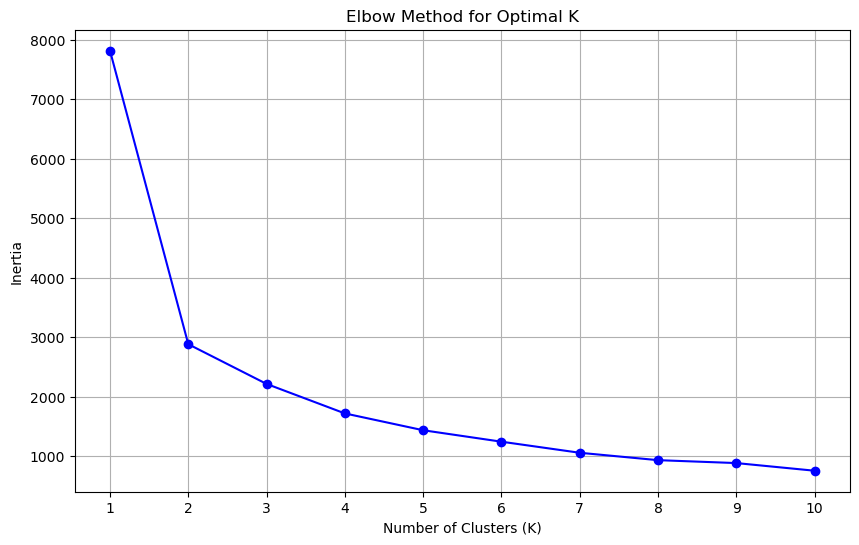

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Choose the Number of Clusters (K)
# Initialize a list to store inertia values
inertia = []

# Define a range of K values to try
k_values = range(1, 11)

# Iterate through each value of K
for k in k_values:
    # Create a KMeans instance with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(df)

    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Step 2: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [8]:
# Step 3: Select the Optimal K
# value of K at the elbow point
optimal_k = 2

# Step 4: Perform K-Means Clustering
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit KMeans to the data
kmeans.fit(df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Print the count of data points in each cluster
print(df['Cluster'].value_counts())


C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
0    64
1    54
Name: count, dtype: int64


C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


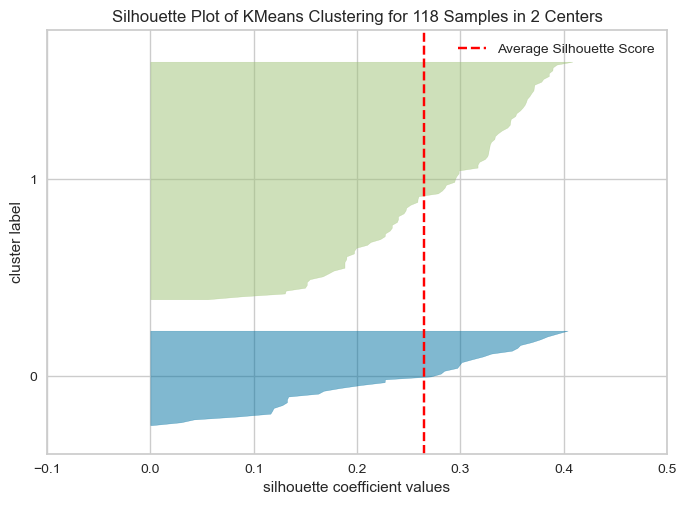

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


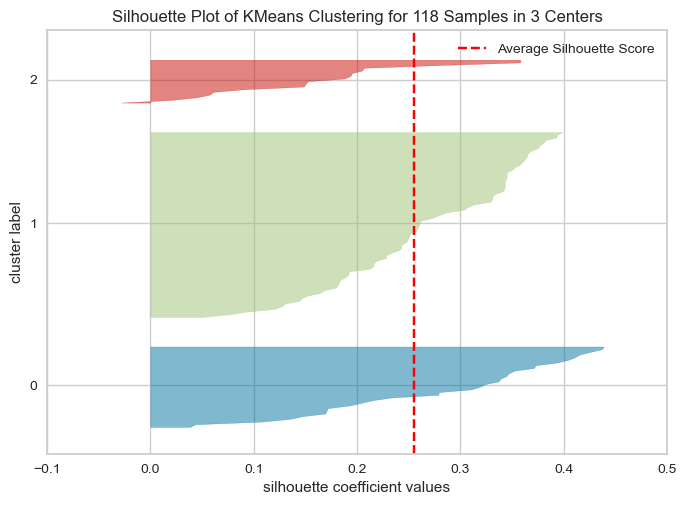

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 118 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

# Drop non-numeric columns
non_numeric_cols = ['Make', 'Model', 'Colour']  # List of non-numeric column names
df = df.drop(columns=non_numeric_cols)

# Scale numerical variables
scaler = StandardScaler()
numerical_cols = ['Income', 'Age']  # List numerical column names
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create a new KMeans model with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)

# Create SilhouetteVisualizer instance with the new KMeans model and 'k' as the metric
visualizer = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')

# Fit the visualizer to the data
visualizer.fit(df)

# Finalize and show the figure
visualizer.show()

# Create a new KMeans model with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)

# Create SilhouetteVisualizer instance with the new KMeans model and 'k' as the metric
visualizer = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')

# Fit the visualizer to the data
visualizer.fit(df)

# Finalize and show the figure
visualizer.show()


In [10]:
#Print the centroids for the model with the optimal value of k
# Fit KMeans model with K=2
features_numpy = df.values
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(features_numpy)

# Print centroids
print("Centroids for the model with K =", optimal_k)
print(kmeans_optimal.cluster_centers_)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroids for the model with K = 2
[[ 0.02680362  0.23529412  0.52941176  0.82352941  0.58823529  1.37721051
   0.55882353]
 [-0.01084908  0.28571429  0.55952381  0.79761905  0.58333333 -0.55744235
   0.41666667]]


In [11]:
#Fit the model with 1 clusters setting max_iter = 1000, name the model:
#km_model_1
from sklearn.cluster import KMeans

# Initialize KMeans model with 1 cluster and max_iter=1000
km_model_1 = KMeans(n_clusters=1, max_iter=1000)

# Fit the model to the scaled features
km_model_1.fit(features_numpy)

# Print the model parameters
print(km_model_1)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=1)


In [12]:
#Have a look at the models labels

# Get the labels assigned by the model
labels_1 = km_model_1.labels_

# Print the labels
print("Labels assigned by km_model_1:")
print(labels_1)


Labels assigned by km_model_1:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


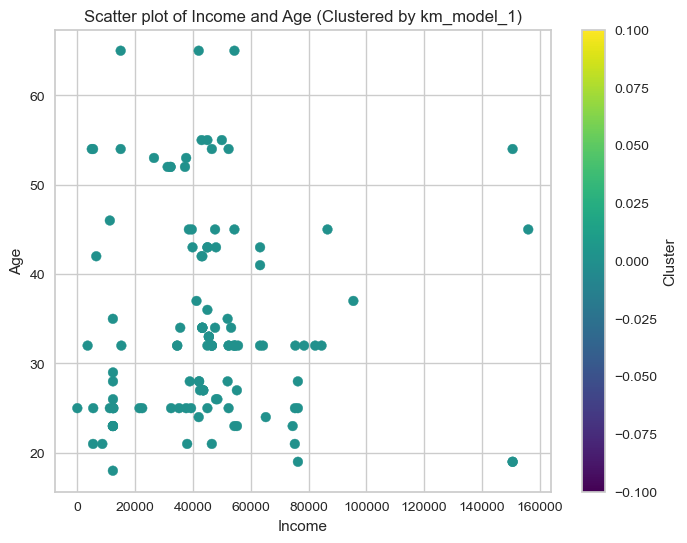

In [13]:
# Plot the scatter graph of Income and Age
plt.figure(figsize=(8, 6))
plt.scatter(df_original['Income'], df_original['Age'], c=labels_1, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatter plot of Income and Age (Clustered by km_model_1)')
plt.colorbar(label='Cluster')
plt.show()



C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


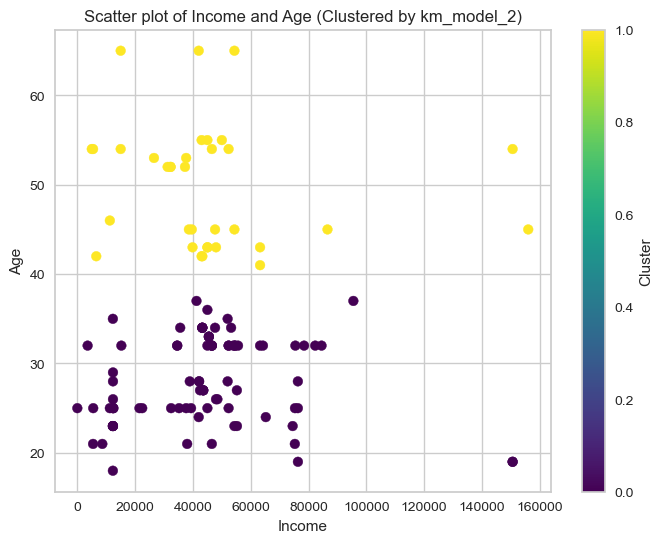

In [14]:
# Fit KMeans model with K=2
km_model_2 = KMeans(n_clusters=2, max_iter=1000)
km_model_2.fit(features_numpy)

# Get the labels assigned by the model
labels_2 = km_model_2.labels_

# Plot the scatter graph of Income and Age for k=2
plt.figure(figsize=(8, 6))
plt.scatter(df_original['Income'], df_original['Age'], c=labels_2, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatter plot of Income and Age (Clustered by km_model_2)')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


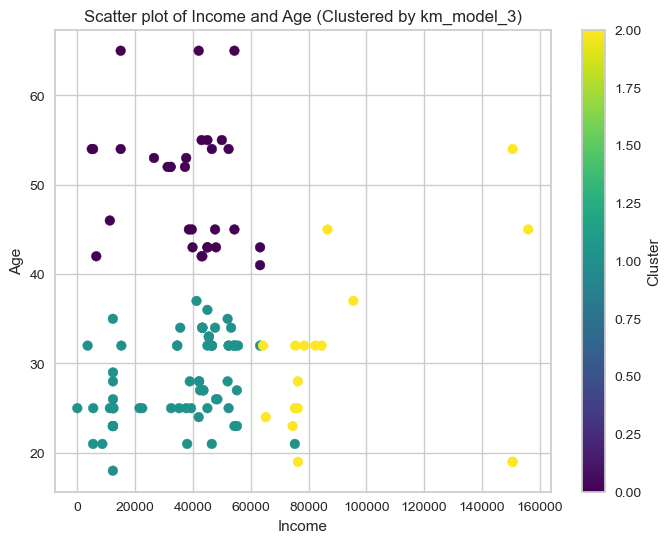

In [15]:
# Fit KMeans model with K=3
km_model_3 = KMeans(n_clusters=3, max_iter=1000)
km_model_3.fit(features_numpy)

# Get the labels assigned by the model
labels_3 = km_model_3.labels_

# Plot the scatter graph of Income and Age for k=3
plt.figure(figsize=(8, 6))
plt.scatter(df_original['Income'], df_original['Age'], c=labels_3, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Scatter plot of Income and Age (Clustered by km_model_3)')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\ellio\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Income'>

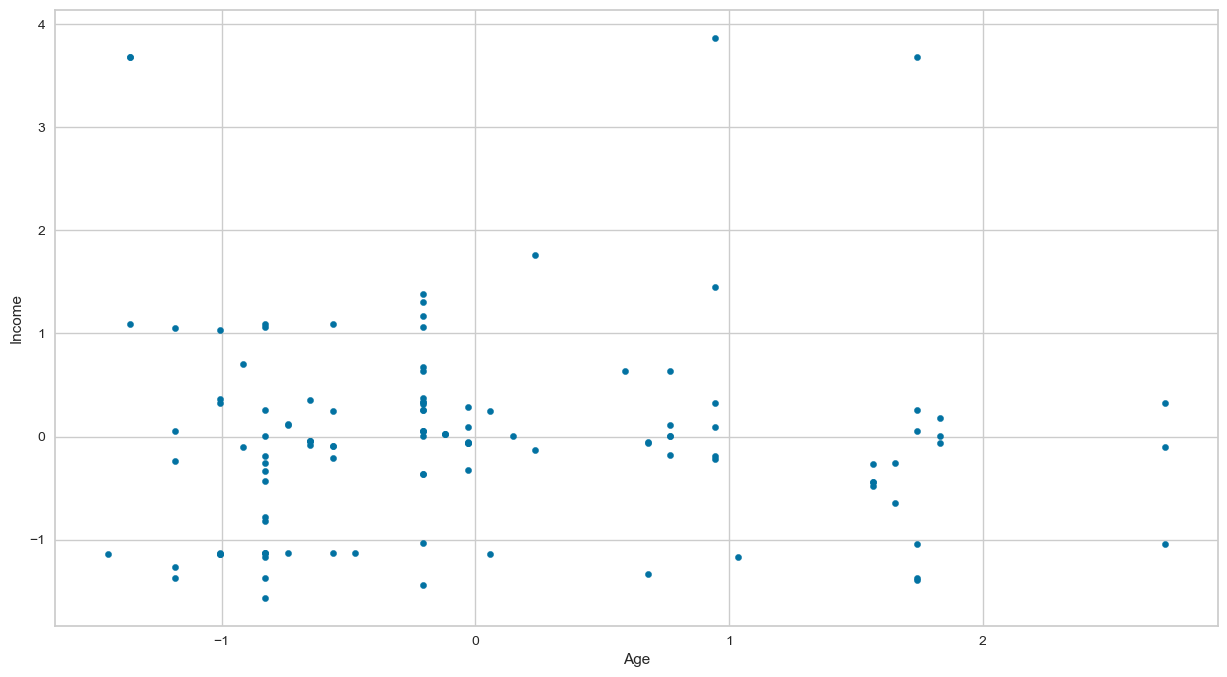

In [16]:
X = df[numerical_cols]

X.plot.scatter('Age','Income',figsize=(15,8))

In [17]:
k=2
kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(X)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
clusters = kmeans.cluster_centers_
print(clusters)

[[-0.01084908 -0.55744235]
 [ 0.02680362  1.37721051]]


In [19]:
X[y==0]['Age']

0     -0.827475
1     -0.827475
2     -1.359101
6     -0.207244
8     -0.561662
         ...   
112   -0.650266
113    0.235778
114   -0.207244
115   -0.207244
117   -0.207244
Name: Age, Length: 84, dtype: float64

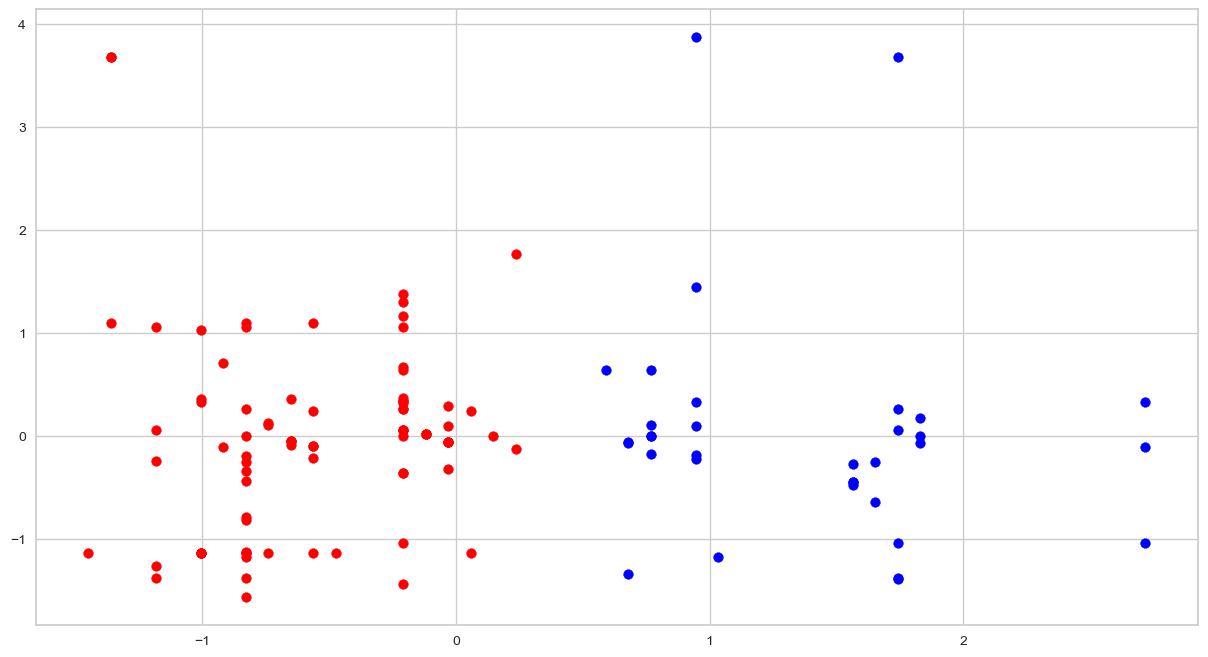

In [20]:
f, ax = plt.subplots(figsize=(15,8))
ax.scatter(X[y==0]['Age'],X[y==0]['Income'],c='red')
ax.scatter(X[y==1]['Age'],X[y==1]['Income'],c='blue')


C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=2))

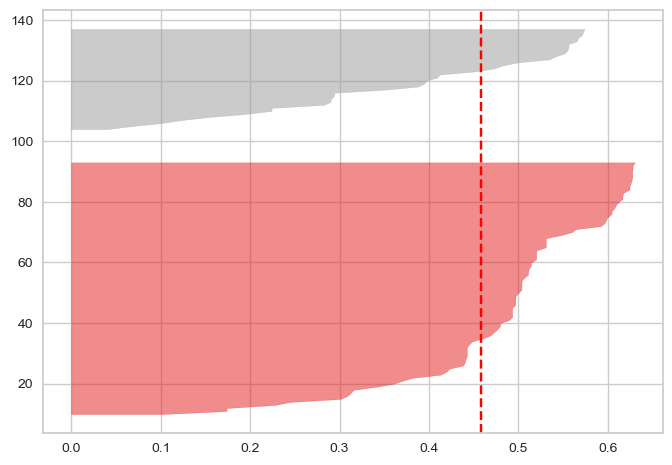

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=3))

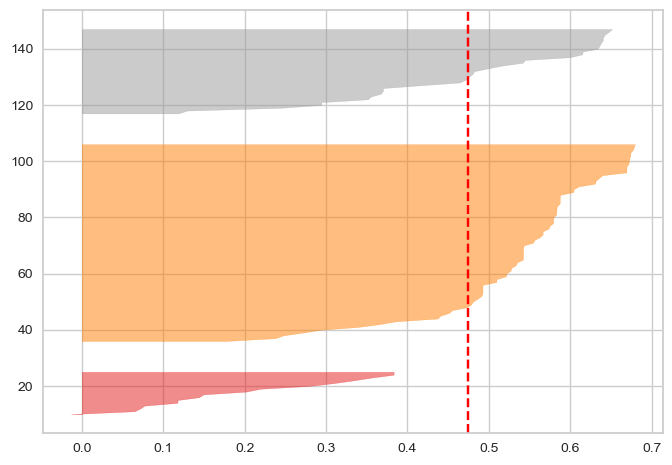

In [22]:
k=3
kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(X)
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4))

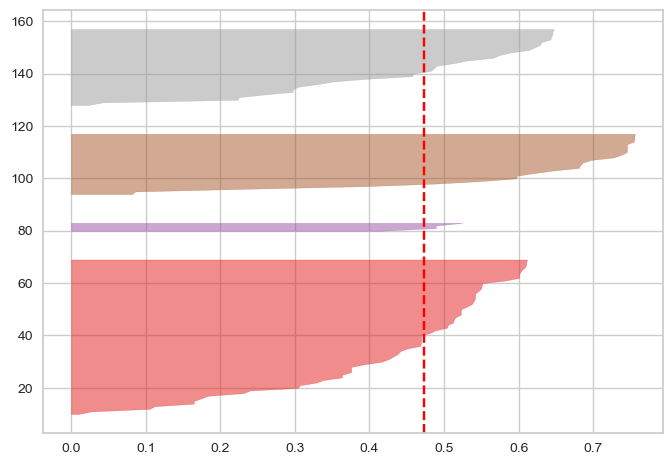

In [23]:
k=4
kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(X)
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=6))

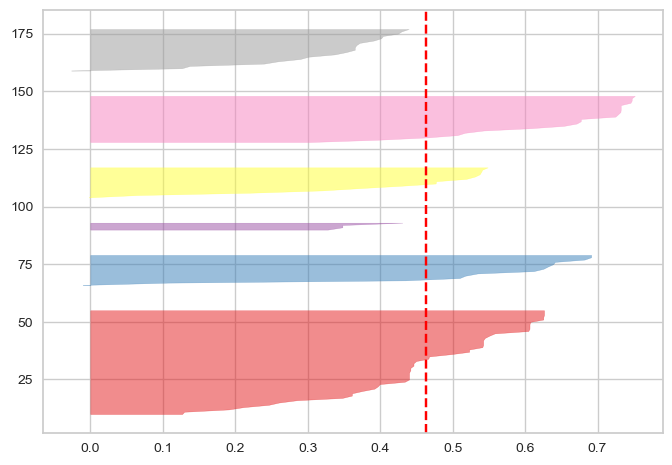

In [24]:
k=6
kmeans = KMeans(n_clusters=k)
y = kmeans.fit_predict(X)
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X)

C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ellio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


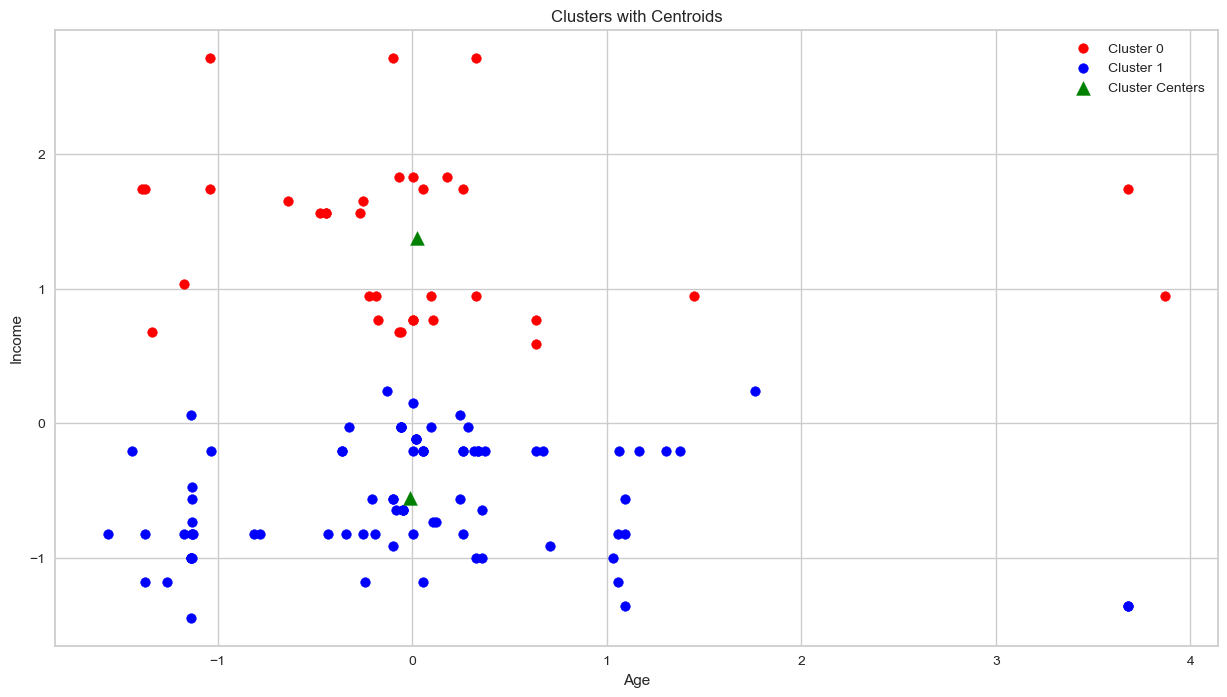

In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Convert DataFrame to NumPy array if needed
X = X.values if isinstance(X, pd.DataFrame) else X

# Assuming X is your dataset
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Plotting the clusters
f, ax = plt.subplots(figsize=(15, 8))
ax.scatter(X[cluster_labels == 0][:, 0], X[cluster_labels == 0][:, 1], c='red', label='Cluster 0')
ax.scatter(X[cluster_labels == 1][:, 0], X[cluster_labels == 1][:, 1], c='blue', label='Cluster 1')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', s=100, c='green', label='Cluster Centers')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters with Centroids')
plt.legend()
plt.show()


In [26]:
# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4585417568075733
